Shape of the dataset: (56252, 13)
Columns in the dataset: Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')
First 5 rows of your dataframe                                              address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate votes                             phone  \
0          Yes        Yes  4.1/5   775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5   787                      080 

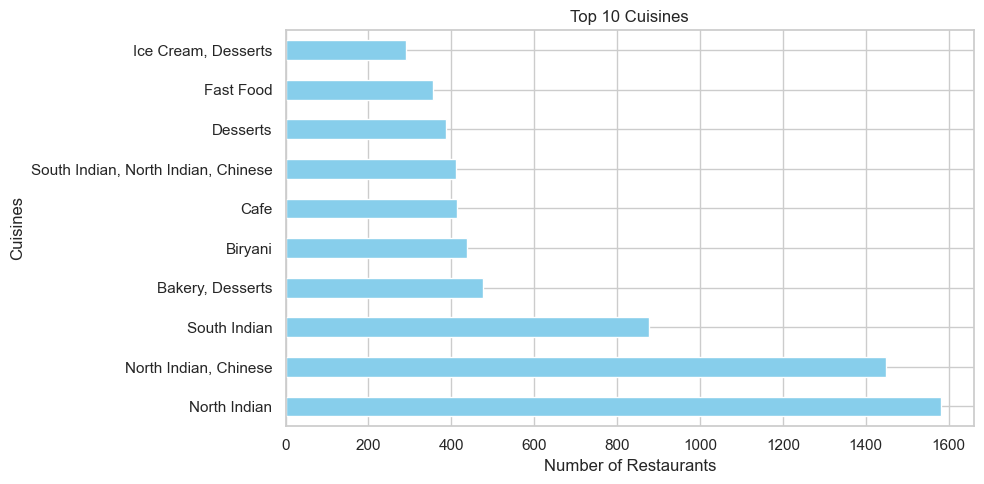

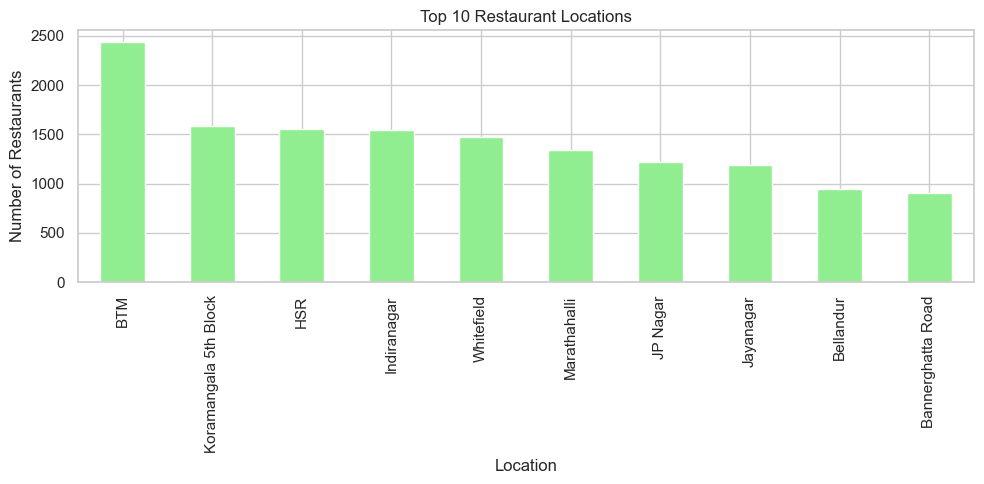

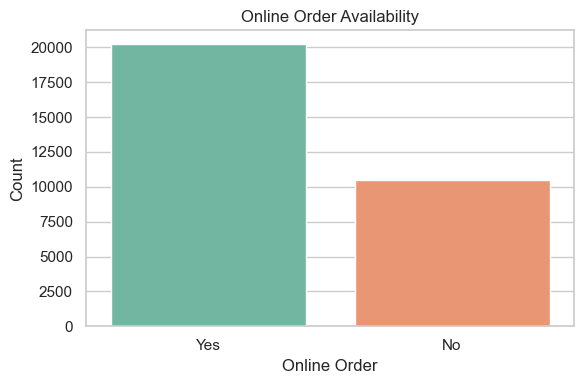

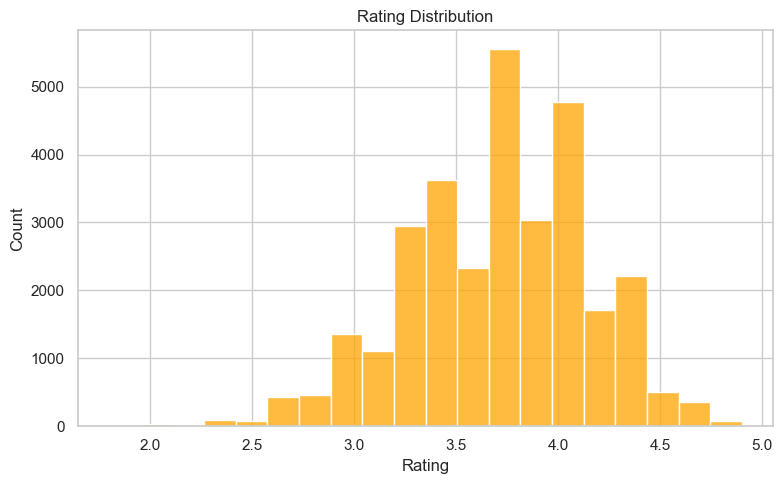

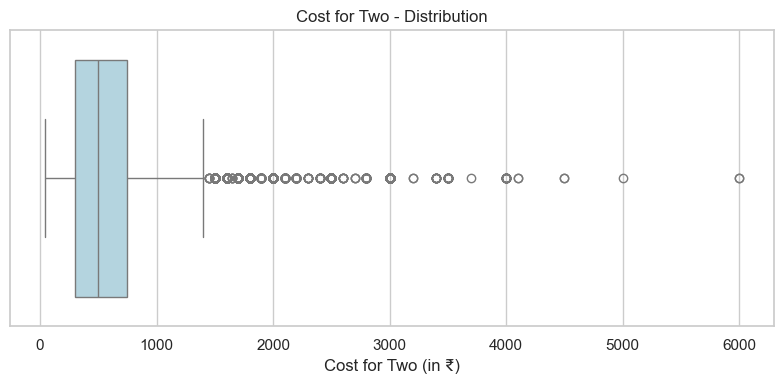

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

df = pd.read_csv("zomato.csv")

print("Shape of the dataset:", df.shape)
print("Columns in the dataset:", df.columns)
print("First 5 rows of your dataframe",df.head())
print("Information",df.info(

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('[^a-zA-Z0-9_]', '', regex=True)

print("Cleaned Column names:", df.columns.tolist())

df.drop_duplicates(inplace=True)

df['rate'] = df['rate'].astype(str)
df['rate'] = df['rate'].str.replace('/5', '').replace(['NEW', '-', 'nan'], pd.NA)
df['rate'] = pd.to_numeric(df['rate'], errors='coerce') 

df['approx_costfor_two_people'] = df['approx_costfor_two_people'].astype(str).str.replace(',', '')
df['approx_costfor_two_people'] = pd.to_numeric(df['approx_costfor_two_people'], errors='coerce')

df.dropna(subset=['rate', 'cuisines', 'location', 'online_order', 'approx_costfor_two_people'], inplace=True)

top_cuisines = df['cuisines'].value_counts().head(10)
plt.figure(figsize=(10, 5))
top_cuisines.plot(kind='barh', color='skyblue')
plt.title("Top 10 Cuisines")
plt.xlabel("Number of Restaurants")
plt.ylabel("Cuisines")
plt.tight_layout()
plt.show()

top_locations = df['location'].value_counts().head(10)
plt.figure(figsize=(10, 5))
top_locations.plot(kind='bar', color='lightgreen')
plt.title("Top 10 Restaurant Locations")
plt.xlabel("Location")
plt.ylabel("Number of Restaurants")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='online_order', data=df, hue='online_order', palette='Set2', legend=False)

plt.title("Online Order Availability")
plt.xlabel("Online Order")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(df['rate'], bins=20, color='orange')
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['approx_costfor_two_people'], color='lightblue')
plt.title("Cost for Two - Distribution")
plt.xlabel("Cost for Two (in ₹)")
plt.tight_layout()
plt.show()
